# 01 — Exploratory Data Analysis (EDA) for MedQuAD

This notebook performs the first-pass exploratory analysis on the **MedQuAD medical Q&A dataset**.  
Our goals here are simple:

1. Load the dataset and inspect its structure  
2. Check for missing values  
3. Analyze question and answer length distributions  
4. Understand what cleaning steps will be needed in Sprint 2  

This is the first step toward building our biomedical QA system.

In [1]:
import os
import pandas as pd

# Flat folder path (since you are storing everything directly in /data/raw/)
MEDQUAD_PATH = os.path.join("..", "data", "raw", "medquad.csv")

df = pd.read_csv(MEDQUAD_PATH)

df.head()

,question,answer,source,focus_area
0,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...,NIHSeniorHealth,Glaucoma
1,What causes Glaucoma ?,"Nearly 2.7 million people have glaucoma, a lea...",NIHSeniorHealth,Glaucoma
2,What are the symptoms of Glaucoma ?,Symptoms of Glaucoma Glaucoma can develop in ...,NIHSeniorHealth,Glaucoma
3,What are the treatments for Glaucoma ?,"Although open-angle glaucoma cannot be cured, ...",NIHSeniorHealth,Glaucoma
4,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...,NIHSeniorHealth,Glaucoma


## 2. Basic Dataset Info

This tells us:
- How many rows/columns the dataset has
- Column names
- Data types
- Memory usage

This helps us understand the data schema before cleaning.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16412 entries, 0 to 16411
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   question    16412 non-null  object
 1   answer      16407 non-null  object
 2   source      16412 non-null  object
 3   focus_area  16398 non-null  object
dtypes: object(4)
memory usage: 513.0+ KB


## 3. Preview of Questions and Answers

Let’s display a few question–answer pairs to understand the style and formatting of the dataset.


In [3]:
df[['question', 'answer']].head(10)

,question,answer
0,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...
1,What causes Glaucoma ?,"Nearly 2.7 million people have glaucoma, a lea..."
2,What are the symptoms of Glaucoma ?,Symptoms of Glaucoma Glaucoma can develop in ...
3,What are the treatments for Glaucoma ?,"Although open-angle glaucoma cannot be cured, ..."
4,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...
5,What is (are) Glaucoma ?,The optic nerve is a bundle of more than 1 mil...
6,What is (are) Glaucoma ?,Open-angle glaucoma is the most common form of...
7,Who is at risk for Glaucoma? ?,Anyone can develop glaucoma. Some people are a...
8,How to prevent Glaucoma ?,"At this time, we do not know how to prevent gl..."
9,What are the symptoms of Glaucoma ?,"At first, open-angle glaucoma has no symptoms...."


## 4. Check for Missing or Duplicate Values

This helps us confirm:
- Whether any rows have empty questions or answers  
- Whether dataset contains duplicated entries  
- Whether cleaning will be needed in Sprint 2  


In [4]:
# Missing values
df.isna().sum()


question       0
answer         5
source         0
focus_area    14
dtype: int64

In [5]:
# Duplicate rows
df.duplicated().sum()


48

## 5. Question & Answer Length Analysis

We compute text lengths to understand:
- Typical question length  
- Typical answer length  
- Whether answers are too long/short  
- Whether we need to trim or clean them  

These statistics matter for:
- Text preprocessing  
- Model token limits  
- Chunking strategies for RAG  

In [6]:
df['question_len'] = df['question'].astype(str).str.len()
df['answer_len'] = df['answer'].astype(str).str.len()

df[['question_len', 'answer_len']].describe()

,question_len,answer_len
count,16412.000000,16412.000000
mean,50.684438,1303.056483
std,16.925355,1656.597408
min,16.000000,3.000000
25%,38.000000,487.000000
50%,48.000000,889.500000
75%,61.000000,1589.000000
max,191.000000,29046.000000


## 6. Distribution Plots

A quick visualization to see how long questions typically are.
This helps us plan model tokenization and chunking in later sprints.


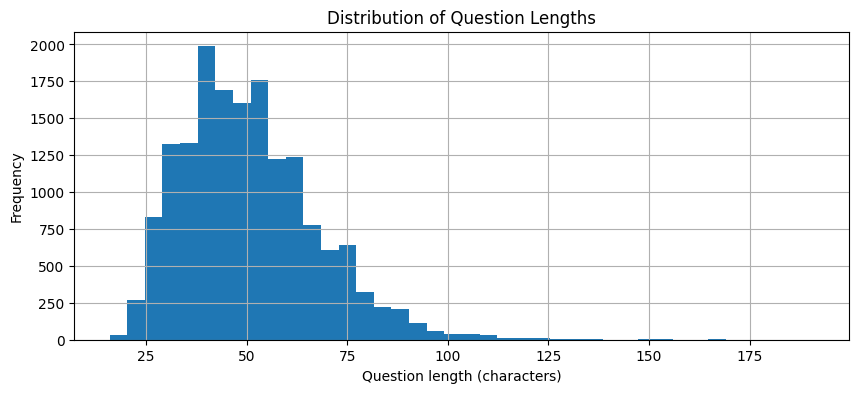

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
df['question_len'].hist(bins=40)
plt.title("Distribution of Question Lengths")
plt.xlabel("Question length (characters)")
plt.ylabel("Frequency")
plt.show()


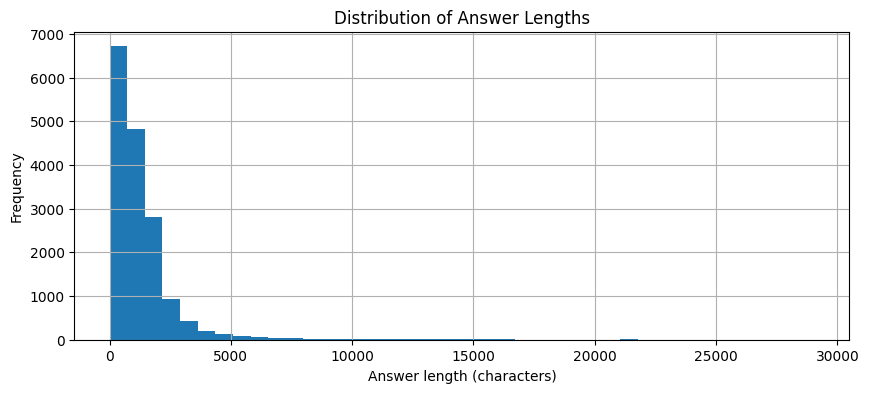

In [8]:
plt.figure(figsize=(10,4))
df['answer_len'].hist(bins=40)
plt.title("Distribution of Answer Lengths")
plt.xlabel("Answer length (characters)")
plt.ylabel("Frequency")
plt.show()


# Summary of Findings

Based on the analysis above, we will use these insights in Sprint 2:

1. **Columns look clean**, but we will still trim whitespace and remove duplicates.  
2. **Some answers may be long**, so we may need light normalization later.  
3. **NER extraction** will work well because MedQuAD’s answers are concise.  
4. The dataset is ready for:  
   - Cleaning  
   - Entity extraction (SciSpaCy)  
   - Graph node/edge generation  

Next step:  
**Sprint 2 — Data Cleaning + NER + Graph Schema Design.**
